# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 647


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"
print(url+api)

city_url = url + api + '&q=' + "city" 
print(city_url)

http://api.openweathermap.org/data/2.5/weather?&appid=320aeabb7c7fa4381fb9ffe242757f06
http://api.openweathermap.org/data/2.5/weather?&appid=320aeabb7c7fa4381fb9ffe242757f06&q=city


In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + api + '&q=' + (city)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
    print (json.dumps(city_weather, indent = 4, sort_keys = True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 34.6391,
        "lon": -120.4579
    },
    "dt": 1699237249,
    "id": 5367788,
    "main": {
        "feels_like": 286.94,
        "humidity": 91,
        "pressure": 1014,
        "temp": 287.11,
        "temp_max": 288.23,
        "temp_min": 286.44
    },
    "name": "Lompoc",
    "sys": {
        "country": "US",
        "id": 4747,
        "sunrise": 1699194353,
        "sunset": 1699232696,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 4.63
    }
}
Processing Record 2 of Set 1 | albany
{
    "base": "stations",
    "clouds": 

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + api + '&q=' + (city)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | toliara
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | port-vila
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | bargara
City not found. Skipping...
Processing Record 11 of Set 1 | chernyshevsk
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | sheridan
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | taizhou
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | illizi
Processing Record 20 of Set 1 | happy valley-goose bay
Processing Record 21 of Set 1 | al bawiti


In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,287.88,97,100,4.63,US,1699239097
1,albany,42.6001,-73.9662,278.90,68,64,1.97,US,1699239395
2,toliara,-23.3500,43.6667,297.53,75,5,2.14,MG,1699239261
3,vilyuchinsk,52.9306,158.4028,273.11,71,78,8.43,RU,1699239395
4,port-vila,-17.7338,168.3219,297.93,94,100,5.14,VU,1699239395


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,287.88,97,100,4.63,US,1699239097
1,albany,42.6001,-73.9662,278.90,68,64,1.97,US,1699239395
2,toliara,-23.3500,43.6667,297.53,75,5,2.14,MG,1699239261
3,vilyuchinsk,52.9306,158.4028,273.11,71,78,8.43,RU,1699239395
4,port-vila,-17.7338,168.3219,297.93,94,100,5.14,VU,1699239395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

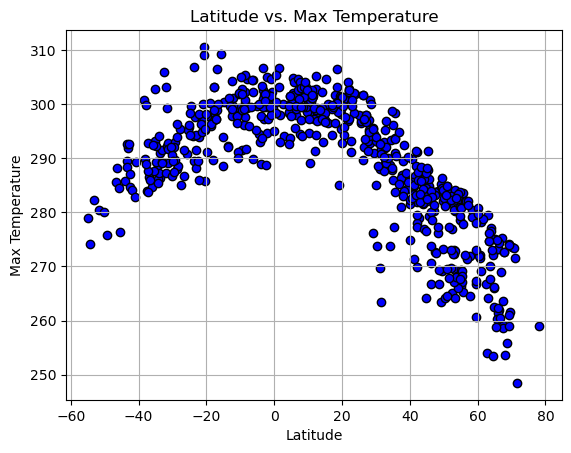

In [57]:
# Build scatter plot for latitude vs. temperature 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

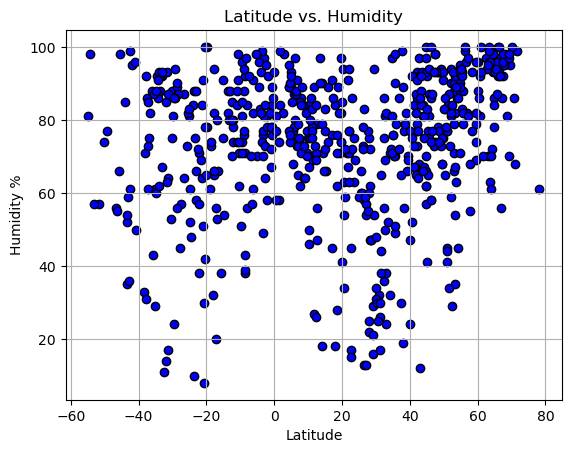

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolors='blue', edgecolors='black')


# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

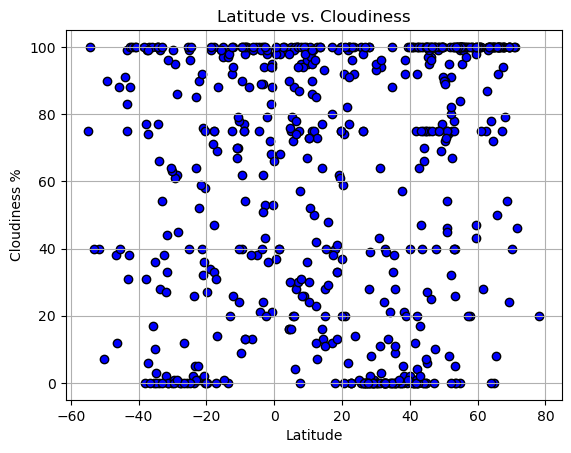

In [62]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

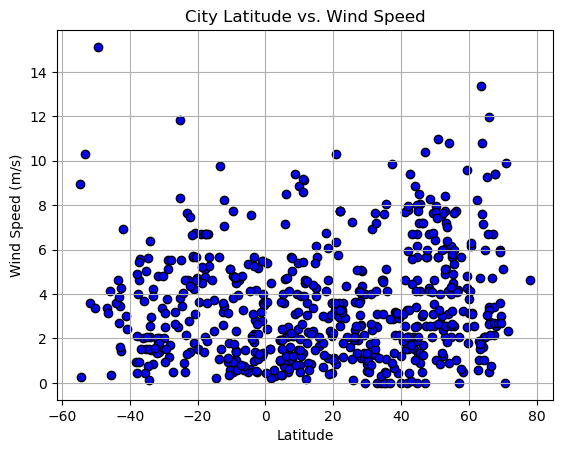

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,287.88,97,100,4.63,US,1699239097
1,albany,42.6001,-73.9662,278.90,68,64,1.97,US,1699239395
3,vilyuchinsk,52.9306,158.4028,273.11,71,78,8.43,RU,1699239395
7,badger,64.8000,-147.5333,266.08,86,100,2.06,US,1699239395
8,hadibu,12.6500,54.0333,299.24,79,100,2.30,YE,1699239395


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,toliara,-23.3500,43.6667,297.53,75,5,2.14,MG,1699239261
4,port-vila,-17.7338,168.3219,297.93,94,100,5.14,VU,1699239395
5,papatowai,-46.5619,169.4708,285.53,56,38,3.36,NZ,1699239395
6,blackmans bay,-43.0167,147.3167,291.89,59,31,3.45,AU,1699239395
13,atafu village,-8.5421,-172.5159,302.21,71,100,1.44,TK,1699239396


###  Temperature vs. Latitude Linear Regression Plot

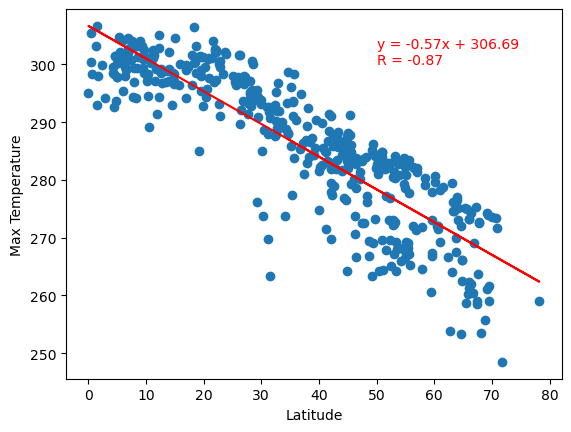

In [92]:
# Linear regression on Northern Hemisphere
# Definig the values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#calculating the values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Scatter plot
plt.scatter(x_values,y_values)
#scatter plot with the line 
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (50, 300), fontsize=10, color="red")
#Labels for x and y
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

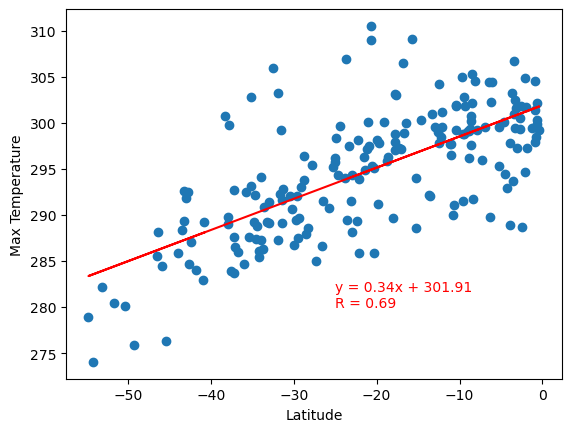

In [90]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (-25, 280), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

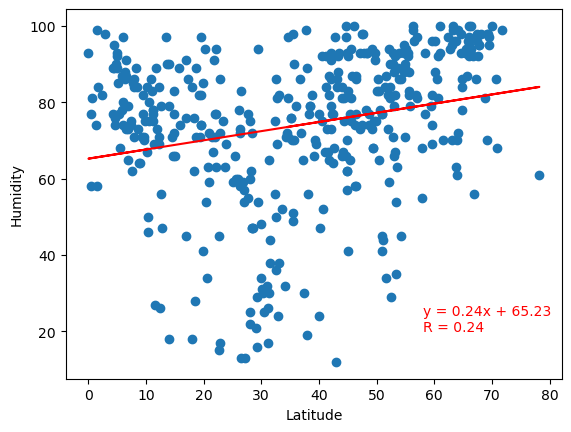

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (58, 20), fontsize=10, color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

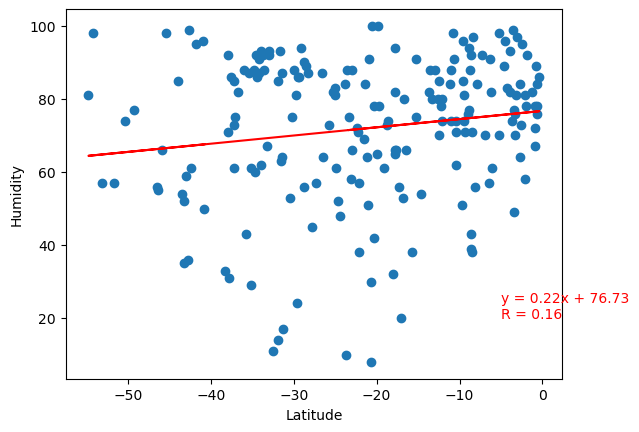

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (-5, 20), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

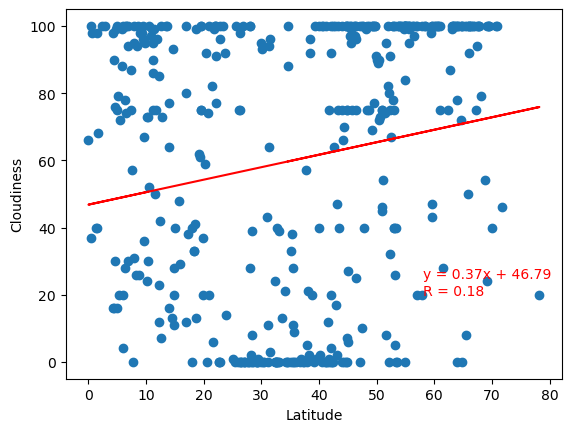

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (58, 20), fontsize=10, color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

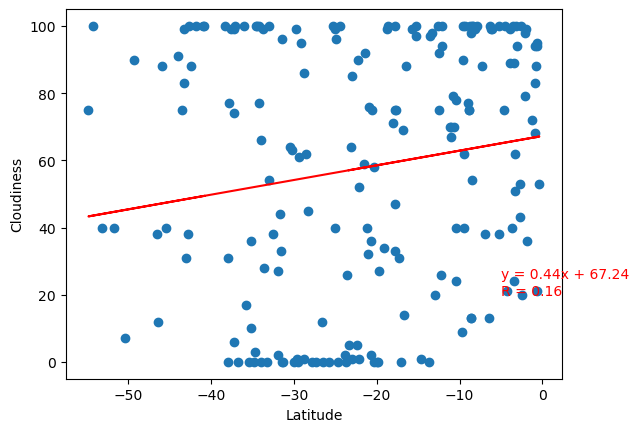

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (-5, 20), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

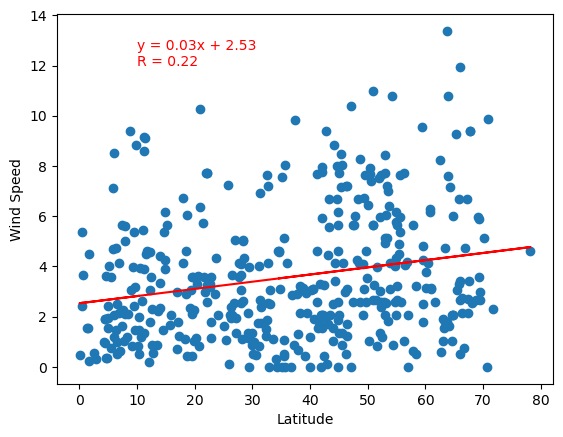

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (10, 12), fontsize=10, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

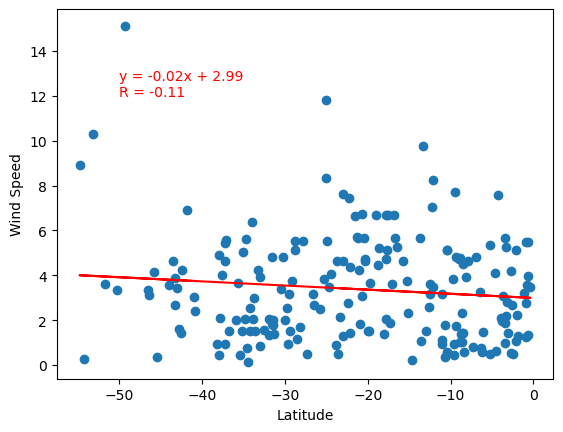

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
r_value = rvalue
plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (-50, 12), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE